# Installation

## Jupyter notebook
**Windows**

launch command line (cmd), then run:

python -m pip install jupyter

then navigate to your desired folder, then run:

jupyter-notebook

## Install packages

In cmd, (usually run) pip instal [package name]


# Data exploration - wanted outcomes

1. Understand the problem
2. Univariate understanding - learn about the dependent variable and each of the features
3. Multivariate understanding - learn how the features (independent variables) affect the dependent variable, and how they correlate with each other
4. Data cleaning - outliers, missing values, features
5. *Transformations -- if needed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})


In [ ]:
df = pd.read_csv('cubic_zirconia.csv', index_col=0)
print(df.columns)



Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')


In [ ]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [ ]:
#Understand the problem: understand sale price of residential property in Ames city, sold between the years 2006-2010

#features: 14 features

print(df.shape)
print(df.info())

(26967, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB
None


# Univariate 

count    26967.000000
mean      3939.518115
std       4024.864666
min        326.000000
25%        945.000000
50%       2375.000000
75%       5360.000000
max      18818.000000
Name: price, dtype: float64


<AxesSubplot: xlabel='price', ylabel='Density'>

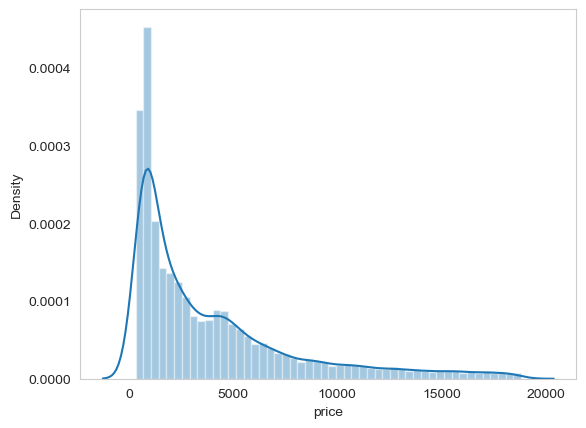

In [ ]:
print(df['price'].describe())
sns.distplot(df['price'])
#dependent var: deviates from normal, skewed to the right, peaks below the ~ mean

In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


# Multivariate

In [ ]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


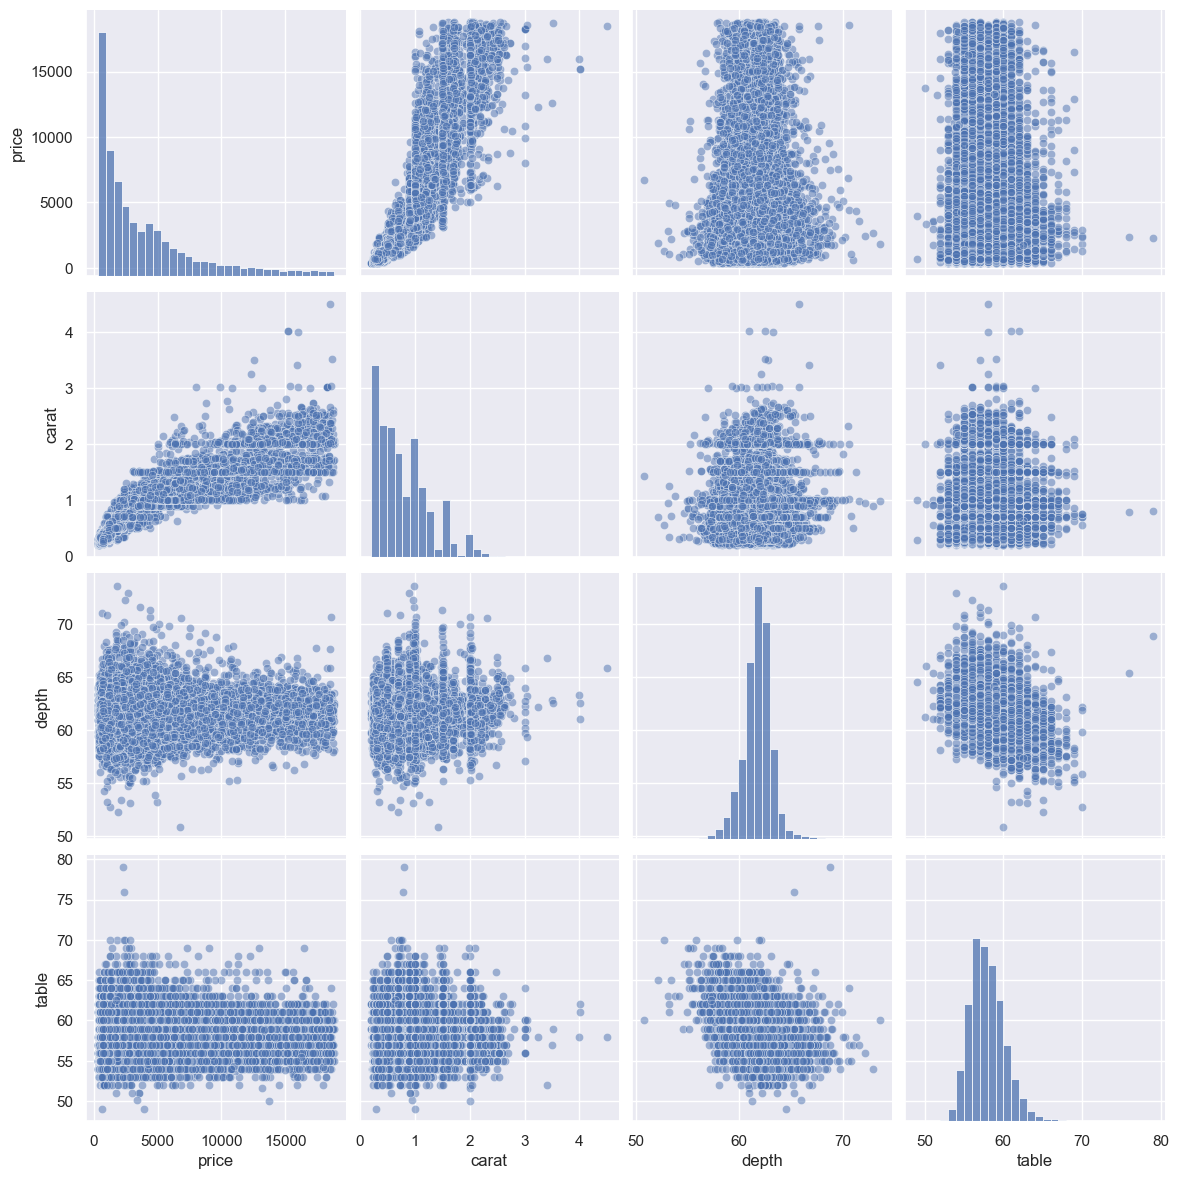

In [ ]:
sns.set()
cols = ['price', 'carat', 'depth', 'table'] #'x', 'y', 'z'

sns.pairplot(df[cols], size=3, diag_kws = {'bins':30},plot_kws={ 'alpha':0.5}) #,hue = 'cut'
plt.show()

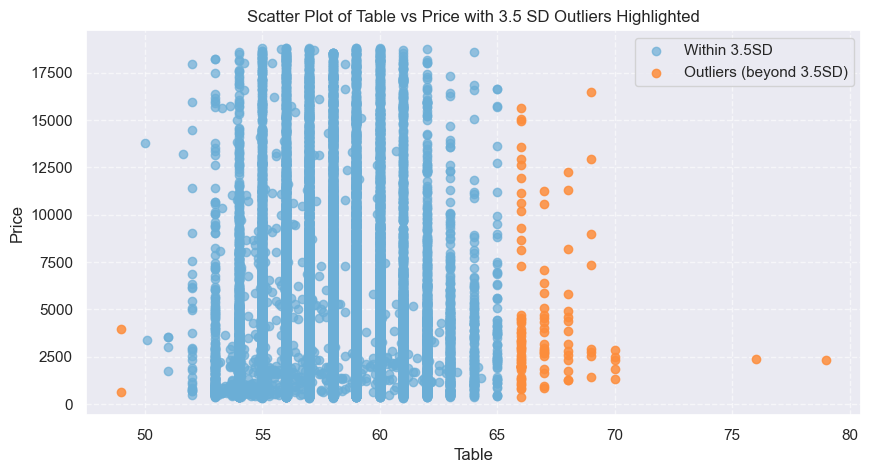

In [ ]:
# Compute mean and standard deviation of 'table'
mean_table = df['table'].mean()
std_table = df['table'].std()

# Define outliers (beyond 2 standard deviations)
outliers = (df['table'] < mean_table - 3.5 * std_table) | (df['table'] > mean_table + 3.5 * std_table)

# Define colors
inlier_color = "#6baed6"  # Soft blue
outlier_color = "#fd8d3c"  # Warm orange

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df['table'][~outliers], df['price'][~outliers], color=inlier_color, alpha=0.7, label="Within 3.5SD")  # Normal points
plt.scatter(df['table'][outliers], df['price'][outliers], color=outlier_color, alpha=0.85, label="Outliers (beyond 3.5SD)")  # Outliers

# Labels and title
plt.xlabel('Table')
plt.ylabel('Price')
plt.title('Scatter Plot of Table vs Price with 3.5 SD Outliers Highlighted')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

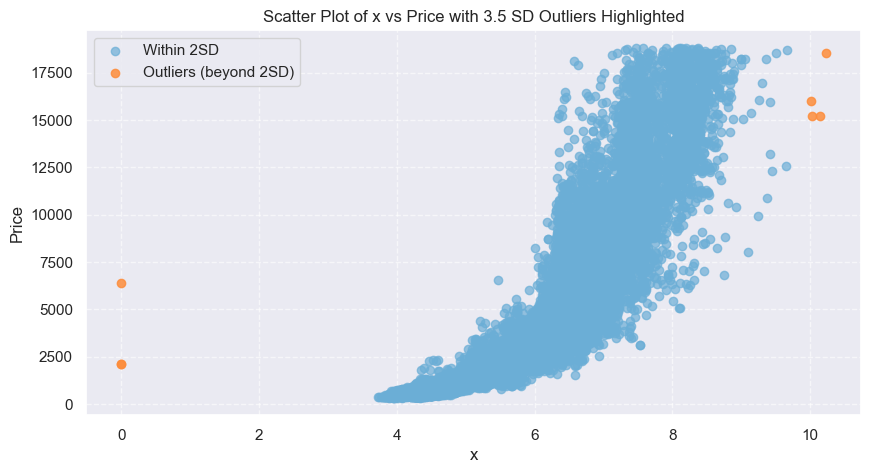

In [ ]:
# Compute mean and standard deviation of 'table'
mean_x = df['x'].mean()
std_x = df['x'].std()

# Define outliers (beyond 2 standard deviations)
outliers_x = (df['x'] < mean_x - 3.5 * std_x) | (df['x'] > mean_x + 3.5 * std_x)

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df['x'][~outliers_x], df['price'][~outliers_x], color=inlier_color, alpha=0.7, label="Within 2SD")  # Normal points
plt.scatter(df['x'][outliers_x], df['price'][outliers_x], color=outlier_color, alpha=0.85, label="Outliers (beyond 2SD)")  # Outliers

# Labels and title
plt.xlabel('x')
plt.ylabel('Price')
plt.title('Scatter Plot of x vs Price with 3.5 SD Outliers Highlighted')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

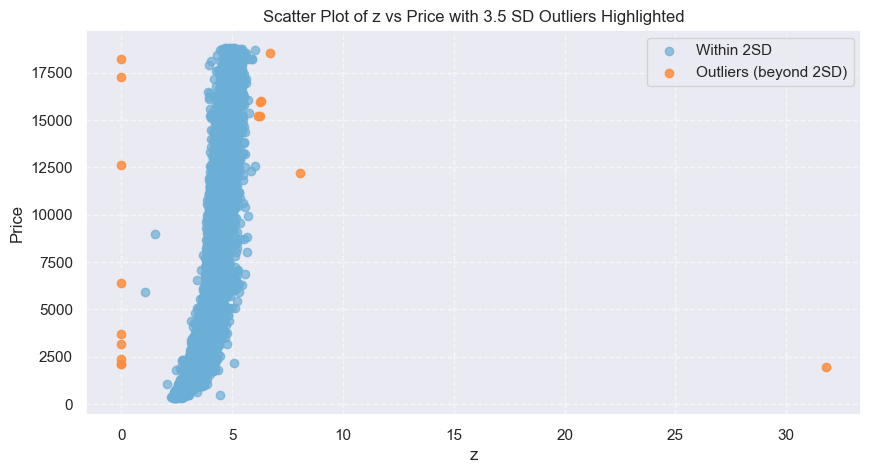

In [ ]:
# Compute mean and standard deviation of 'table'
mean_z = df['z'].mean()
std_z = df['z'].std()

# Define outliers (beyond 2 standard deviations)
outliers_z= (df['z'] < mean_z - 3.5 * std_z) | (df['z'] > mean_z + 3.5 * std_z)

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df['z'][~outliers_z], df['price'][~outliers_z], color=inlier_color, alpha=0.7, label="Within 2SD")  # Normal points
plt.scatter(df['z'][outliers_z], df['price'][outliers_z], color=outlier_color, alpha=0.85, label="Outliers (beyond 2SD)")  # Outliers

# Labels and title
plt.xlabel('z')
plt.ylabel('Price')
plt.title('Scatter Plot of z vs Price with 3.5 SD Outliers Highlighted')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

In [ ]:
# Make copy to avoid changing original data 
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
2,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
3,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


<AxesSubplot: >

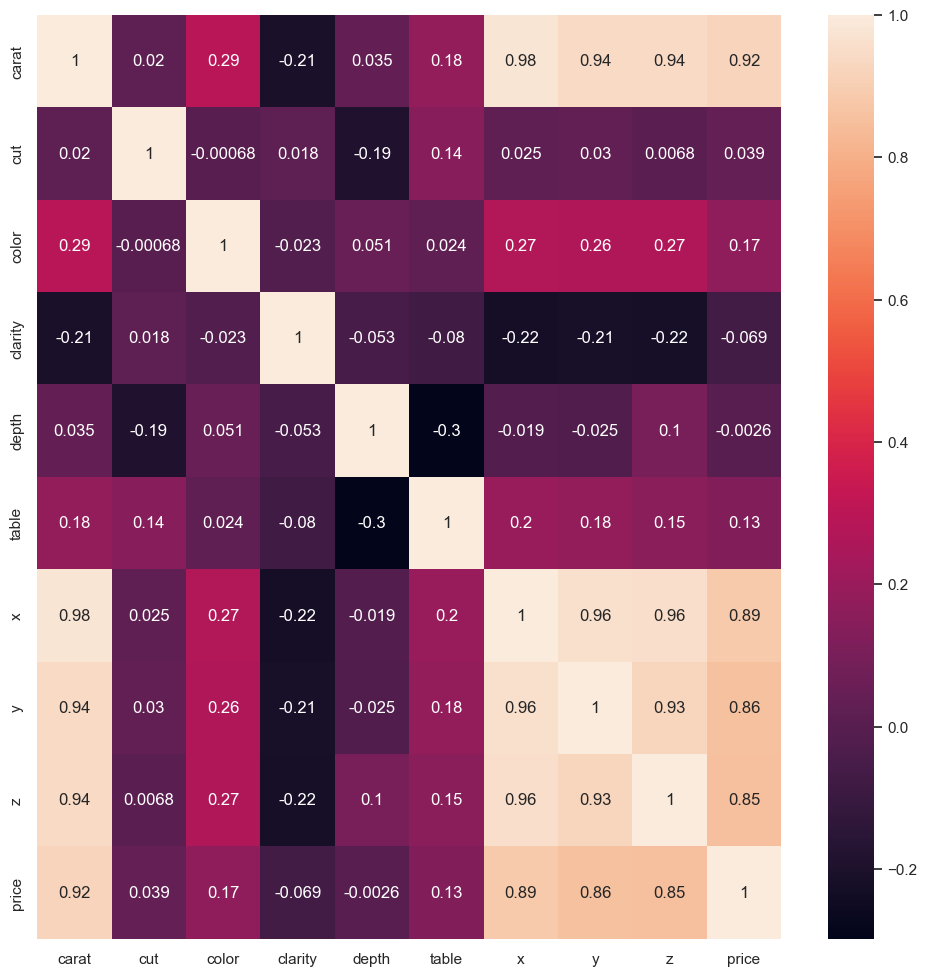

In [ ]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,annot=True, )

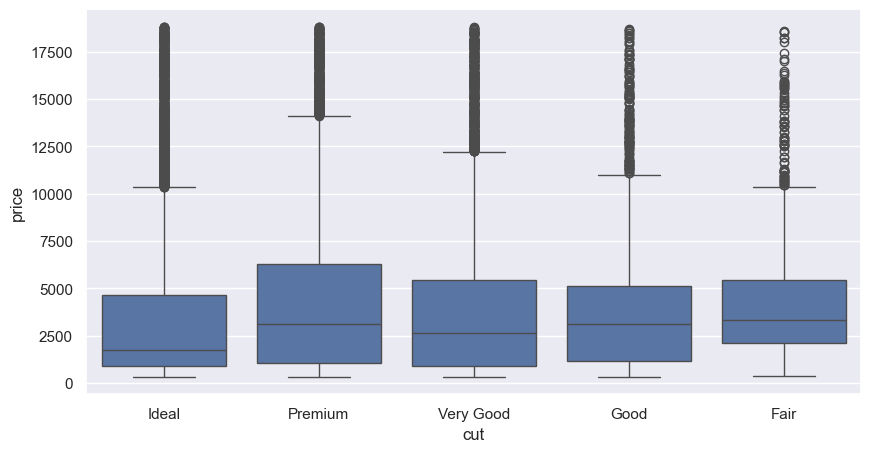

In [ ]:
var = 'cut'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x=var, y="price", data=data)
# plt.xticks(rotation=90)
plt.show()

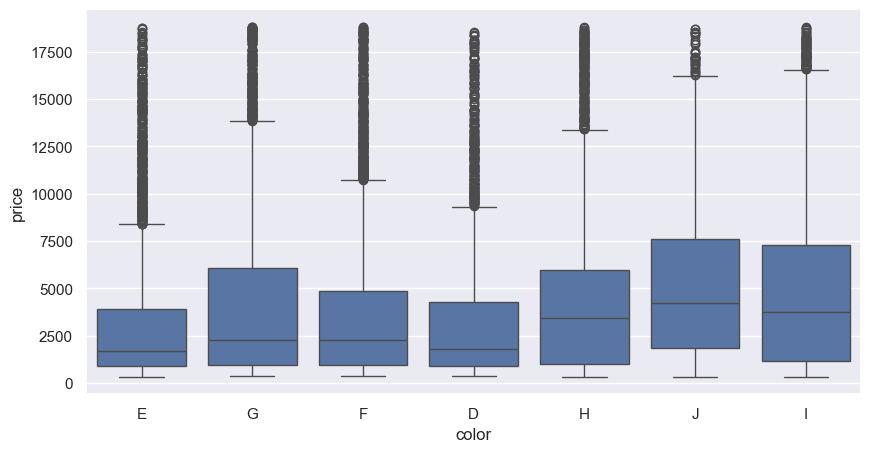

In [ ]:
var = 'color'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x=var, y="price", data=data)
# plt.xticks(rotation=90)
plt.show()

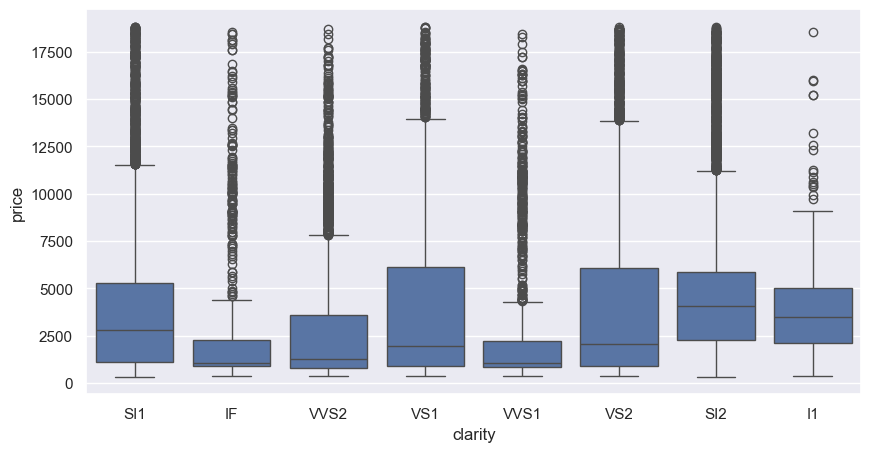

In [ ]:
var = 'clarity'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x=var, y="price", data=data)
# plt.xticks(rotation=90)
plt.show()

## Missing data

1. How prevalent is the missing data?
2. Is missing data random or does it have a pattern?

Strategies to handle missing data:

1. Impute (mean, normal distributed...)
2. remove observations
3. remove features

In [ ]:
#Missing values
print(df.isnull().sum())


carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64


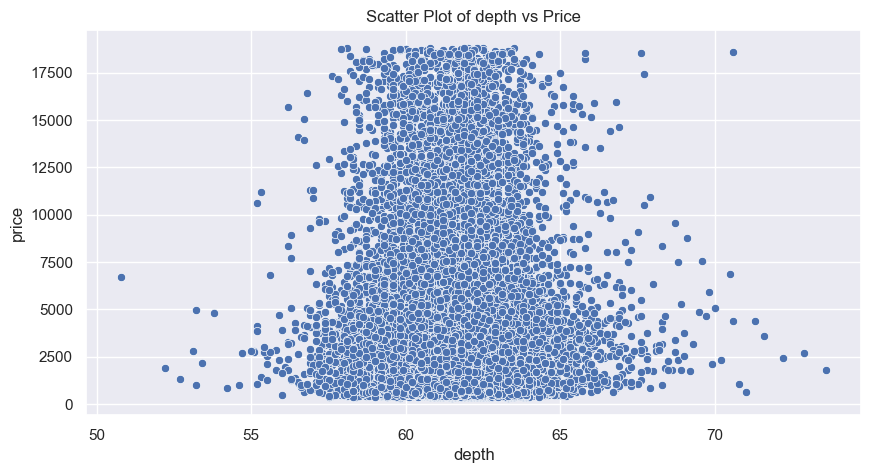

In [ ]:

var = 'depth'  # or 'Foundation'
data = pd.concat([df['price'], df[var]], axis=1)  # Ensure 'price' and 'depth' exist

f, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=var, y="price", data=data, ax=ax)  # Use 'price' instead of 'SalePrice'

plt.title(f"Scatter Plot of {var} vs Price")
plt.show()

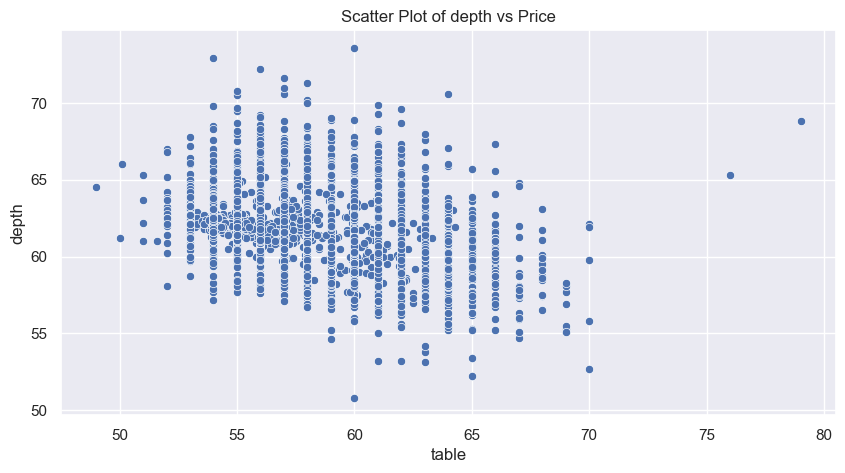

In [ ]:

f, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=df['table'], y=df['depth'], data=data, ax=ax)  # Use 'price' instead of 'SalePrice'

plt.title(f"Scatter Plot of {var} vs Price")
plt.show()

In [ ]:
price_array = df['price'].values.reshape(-1, 1)  # Convert to 2D array

# Standardize prices
saleprice_scaled = StandardScaler().fit_transform(price_array)

# Get sorted values (instead of using argsort incorrectly)
sorted_values = np.sort(saleprice_scaled[:, 0])  # Sort by values

# Extract 10 lowest and 10 highest values
low_range = sorted_values[:10]
high_range = sorted_values[-10:]

print('Outer range (low) of the distribution:')
print(low_range)

print('\nOuter range (high) of the distribution:')
print(high_range)

Outer range (low) of the distribution:
[-0.89781531 -0.89781531 -0.89557917 -0.89533071 -0.89533071 -0.89508225
 -0.89483379 -0.89334303 -0.89309457 -0.89309457]

Outer range (high) of the distribution:
[3.68205092 3.68229938 3.68379015 3.68726859 3.68900781 3.69000165
 3.69099549 3.69099549 3.69323163 3.69671007]


# Transformations

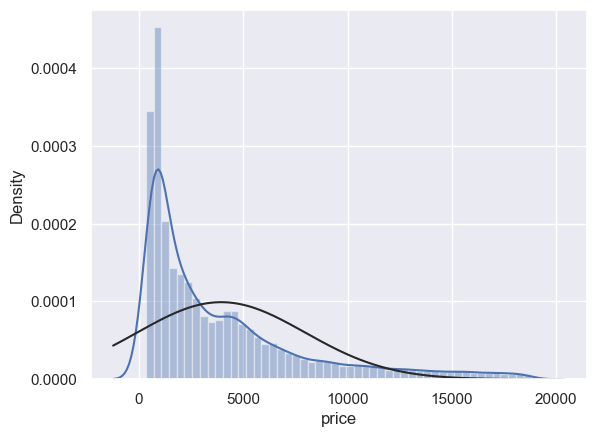

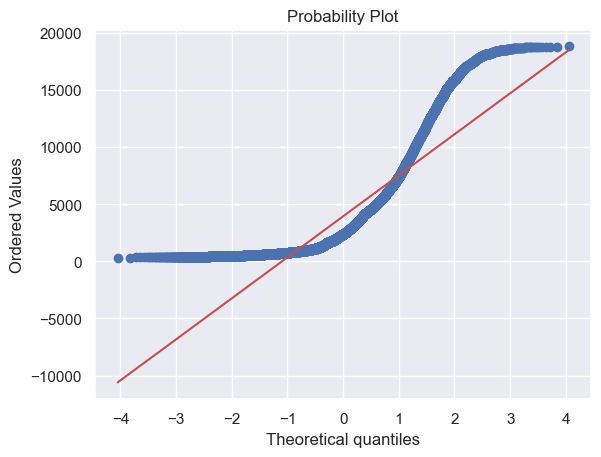

In [ ]:
sns.distplot(df['price'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

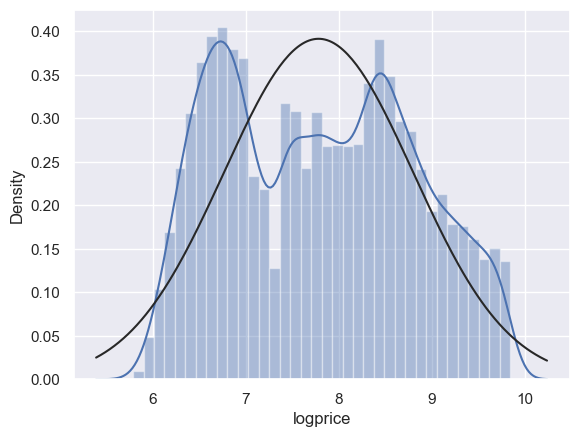

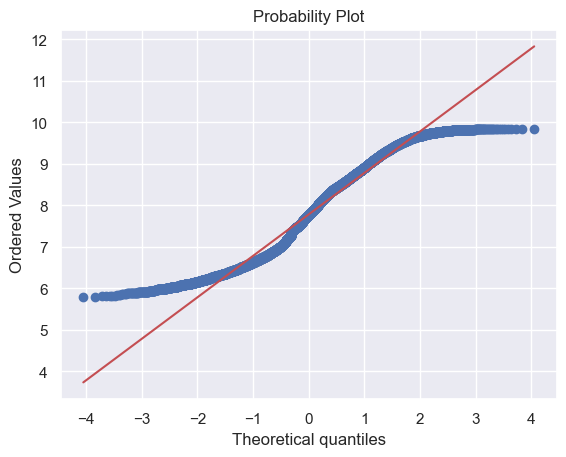

In [ ]:
df['logprice'] = np.log(df['price'])
#transformed histogram and normal probability plot
sns.distplot(df['logprice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df['logprice'], plot=plt)
#Sometimes we will want to transform the features as well

In [ ]:
#Get dummies
df_reg = pd.get_dummies(df,drop_first=True)
df_reg

,carat,depth,table,x,y,z,price,logprice,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.30,62.1,58.0,4.27,4.29,2.66,499,6.212606,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.33,60.8,58.0,4.42,4.46,2.70,984,6.891626,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0.90,62.2,60.0,6.04,6.12,3.78,6289,8.746557,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.42,61.6,56.0,4.82,4.80,2.96,1082,6.986566,False,True,...,False,False,False,False,False,False,True,False,False,False
5,0.31,60.4,59.0,4.35,4.43,2.65,779,6.658011,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,1.11,62.3,58.0,6.61,6.52,4.09,5408,8.595635,False,False,...,False,False,False,False,True,False,False,False,False,False
26964,0.33,61.9,55.0,4.44,4.42,2.74,1114,7.015712,False,True,...,True,False,False,True,False,False,False,False,False,False
26965,0.51,61.7,58.0,5.12,5.15,3.17,1656,7.412160,False,False,...,False,False,False,False,False,False,False,True,False,False
26966,0.27,61.8,56.0,4.19,4.20,2.60,682,6.525030,False,False,...,False,False,False,False,False,False,False,False,False,True


          Feature   Coefficient
0           carat  13157.219854
1           depth   -177.573820
2           table    -52.385463
3               x  -3775.088929
4               y      8.837410
5               z   -490.404174
6        logprice   2325.146092
7        cut_Good    322.814842
8       cut_Ideal    442.385108
9     cut_Premium    466.397852
10  cut_Very Good    405.430136
11        color_E    -75.842892
12        color_F    -63.903482
13        color_G   -112.574534
14        color_H   -389.285339
15        color_I   -615.128125
16        color_J  -1156.166928
17     clarity_IF   2759.770516
18    clarity_SI1   2293.105009
19    clarity_SI2   1704.134047
20    clarity_VS1   2710.818141
21    clarity_VS2   2571.096382
22   clarity_VVS1   2695.871942
23   clarity_VVS2   2805.497380


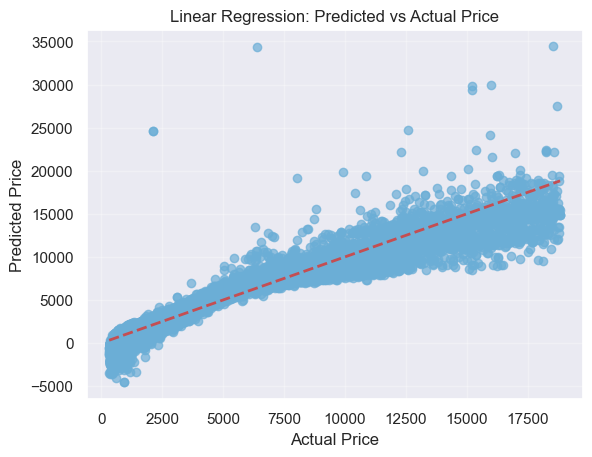

In [ ]:
# Define target variable (Price) and explanatory variables (X)
df_reg_na = df_reg.dropna()
y = df_reg_na["price"]
X = df_reg_na.drop(columns=["price"])

# Fit linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Get coefficients
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)

# Scatter plot of actual vs predicted prices
plt.scatter(y, model.predict(X), alpha=0.7, color="#6baed6")  # Soft blue
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # 1:1 line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Predicted vs Actual Price")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import statsmodels.api as sm
y = df_reg_na["price"]
X = df_reg_na.drop(columns=["price"])

# Ensure that all columns in X are numeric (convert bool to int)
X = X.astype(int)

# Add constant term (intercept) to the predictors
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression summary (coefficients, p-values, etc.)
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     7392.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:14:08   Log-Likelihood:            -2.2839e+05
No. Observations:               26270   AIC:                         4.568e+05
Df Residuals:                   26245   BIC:                         4.570e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.558e+04    673.007    -23.150

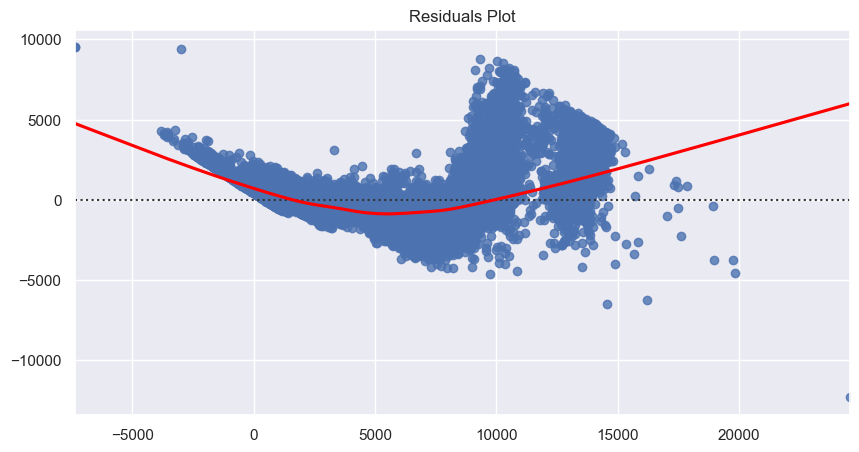

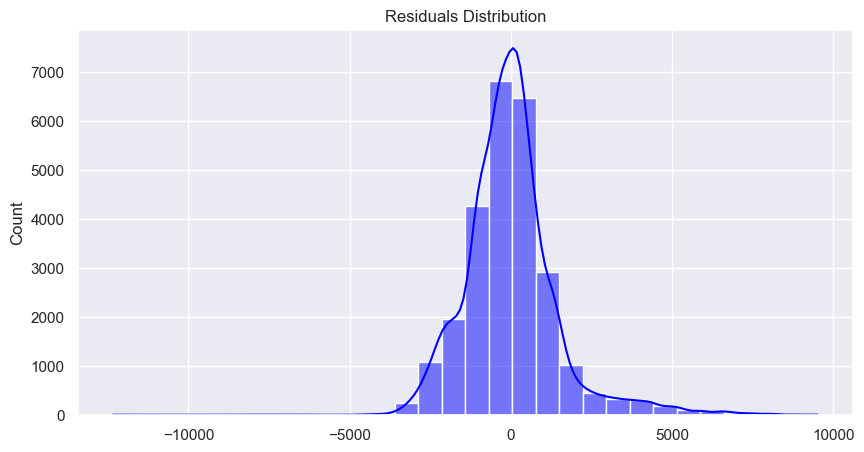

In [ ]:
# Plot the residuals
fig, ax = plt.subplots(figsize=(10, 5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
ax.set_title("Residuals Plot")
plt.show()


# Check for residuals' histogram to see their distribution
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(model.resid, kde=True, bins=30, color='blue')
ax.set_title("Residuals Distribution")
plt.show()

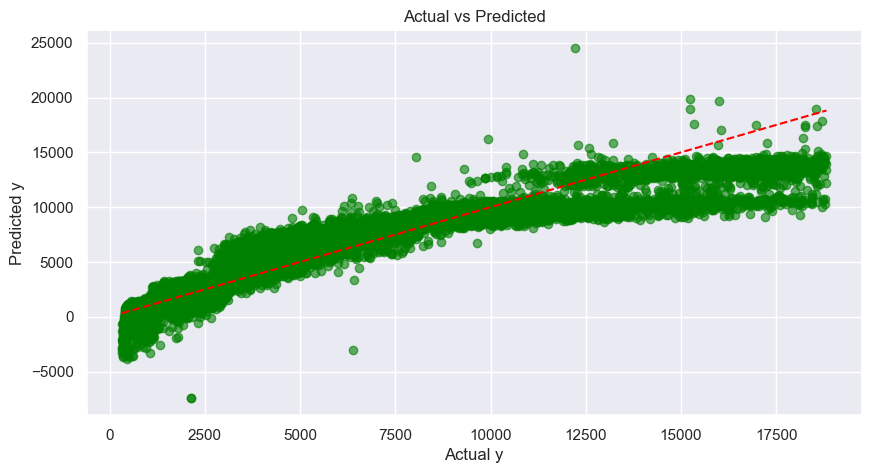

In [ ]:

# Plot Actual vs Predicted (True vs Predicted y)
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(y, model.fittedvalues, alpha=0.6, color='green')
ax.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Add 45-degree line
ax.set_xlabel('Actual y')
ax.set_ylabel('Predicted y')
ax.set_title('Actual vs Predicted')
plt.show()